# Predicting the Winning Football Team

- Sports betting is a 500 billion dollar market (Sydney Herald)

- Football is played by 250 million players in over 200 countries (most popular sport globally).
- The English Premier League is the most popular domestic team in the world.
- Design a predictive model capable of accurately predicting if the home team will win a football match? 


**Discription of Dataset**

**A prediction system was built to predict whether a home team will win it's match or not.**

Key to results data:
* Div = League Division
* Date = Match Date (dd/mm/yy)
* Time = Time of match kick-off
* HomeTeam = Home Team
* Away team = Away Team
* FTHG and HG = Full Time Home Team Goals
* FTAG and AG = Full-Time Away Team Goals
* FTR and Res = Full-Time Result (H=Home Win, D=Draw, A=Away Win)
* HTHG = Half Time Home Team Goals
* HTAG = Half Time Away Team Goals
* HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)
* Attendance = Crowd Attendance
* Referee = Match Referee
* HS = Home Team Shots
* AS = Away Team Shots
* HST = Home Team Shots on Target
* AST = Away Team Shots on Target
* HHW = Home Team Hit Woodwork
* AHW = Away Team Hit Woodwork
* HC = Home Team Corners
* AC = Away Team Corners
* HF = Home Team Fouls Committed
* AF = Away Team Fouls Committed
* HFKC = Home Team Free Kicks Conceded
* AFKC = Away Team Free Kicks Conceded
* HO = Home Team Offsides
* AO = Away Team Offsides
* HY = Home Team Yellow Cards
* AY = Away Team Yellow Cards
*HR = Home Team Red Cards
AR = Away Team Red Cards
HBP = Home Team Bookings Points (10 = yellow, 25 = red)
ABP = Away Team Bookings Points (10 = yellow, 25 = red)

### Importing the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

In [2]:
# Read data from the CSV into a dataframe
folder='input/'
raw_data_9 = pd.read_csv(folder +'2008-09.csv')
raw_data_10 = pd.read_csv(folder +'2009-10.csv')
raw_data_11 = pd.read_csv(folder +'2010-11.csv')
raw_data_12 = pd.read_csv(folder +'2011-12.csv')
raw_data_13 = pd.read_csv(folder +'2012-13.csv')
raw_data_14 = pd.read_csv(folder +'2013-14.csv')
raw_data_15 = pd.read_csv(folder +'2014-15.csv')
raw_data_16 = pd.read_csv(folder +'2015-16.csv')


In [3]:

#Gets all the statistics related to gameplay
                      
columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

playing_statistics_9 = raw_data_9[columns_req]
playing_statistics_10 = raw_data_10[columns_req]
playing_statistics_11 = raw_data_11[columns_req]   
playing_statistics_12 = raw_data_12[columns_req]
playing_statistics_13 = raw_data_13[columns_req]
playing_statistics_14 = raw_data_14[columns_req]
playing_statistics_15 = raw_data_15[columns_req]
playing_statistics_16 = raw_data_16[columns_req]


**GOALS SCORED AND CONCEDED AT THE END OF MATCHWEEK, ARRANGED BY TEAMS AND MATCHWEEK**

In [4]:
# Gets the goals scored agg arranged by teams and matchweek
def get_goals_scored(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat['HomeTeam'].unique():
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        HTGS = playing_stat.iloc[i]['FTHG']
        ATGS = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored



# Gets the goals conceded agg arranged by teams and matchweek
def get_goals_conceded(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat['HomeTeam'].unique():
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']
        HTGC = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsConceded[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded

def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)
   
    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1)% 10) == 0:
            j = j + 1
        
    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC
    
    return playing_stat


# Apply to each dataset
playing_statistics_9 = get_gss(playing_statistics_9)
playing_statistics_10 = get_gss(playing_statistics_10)
playing_statistics_11 = get_gss(playing_statistics_11)
playing_statistics_12 = get_gss(playing_statistics_12)
playing_statistics_13 = get_gss(playing_statistics_13)
playing_statistics_14 = get_gss(playing_statistics_14)
playing_statistics_15 = get_gss(playing_statistics_15)
playing_statistics_16 = get_gss(playing_statistics_16)


**GET RESPECTIVE POINTS**

In [5]:
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0
    

def get_cuml_points(matchres):
    matchres_points = matchres.map(get_points)
    for i in range(2,39):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
        
    matchres_points.insert(column =0, loc = 0, value = [0*i for i in range(20)])
    return matchres_points


def get_matchres(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat['HomeTeam'].unique():
        teams[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
            
    return pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T

def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1
            
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat
    
# Apply to each dataset
playing_statistics_9 = get_agg_points(playing_statistics_9)
playing_statistics_10 = get_agg_points(playing_statistics_10)
playing_statistics_11 = get_agg_points(playing_statistics_11)
playing_statistics_12 = get_agg_points(playing_statistics_12)
playing_statistics_13 = get_agg_points(playing_statistics_13)
playing_statistics_14 = get_agg_points(playing_statistics_14)
playing_statistics_15 = get_agg_points(playing_statistics_15)
playing_statistics_16 = get_agg_points(playing_statistics_16)

**GET TEAM FORM:**

In [6]:
def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    for i in range(num,39):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1           
    return form_final

def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    h = ['M' for i in range(num * 10)]  # since form is not available for n MW (n*10)
    a = ['M' for i in range(num * 10)]
    
    j = num
    for i in range((num*10),380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        
        past = form.loc[ht][j]               # get past n results
        h.append(past[num-1])                    # 0 index is most recent
        
        past = form.loc[at][j]               # get past n results.
        a.append(past[num-1])                   # 0 index is most recent
        
        if ((i + 1)% 10) == 0:
            j = j + 1

    playing_stat['HM' + str(num)] = h                 
    playing_stat['AM' + str(num)] = a

    
    return playing_stat


def add_form_df(playing_statistics):
    playing_statistics = add_form(playing_statistics,1)
    playing_statistics = add_form(playing_statistics,2)
    playing_statistics = add_form(playing_statistics,3)
    playing_statistics = add_form(playing_statistics,4)
    playing_statistics = add_form(playing_statistics,5)
    return playing_statistics    
    
# Make changes to df
playing_statistics_9 = add_form_df(playing_statistics_9)
playing_statistics_10 = add_form_df(playing_statistics_10)
playing_statistics_11 = add_form_df(playing_statistics_11)
playing_statistics_12 = add_form_df(playing_statistics_12)
playing_statistics_13 = add_form_df(playing_statistics_13)
playing_statistics_14 = add_form_df(playing_statistics_14)
playing_statistics_15 = add_form_df(playing_statistics_15)
playing_statistics_16 = add_form_df(playing_statistics_16)

In [7]:
# Rearranging columns
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]

playing_statistics_9 = playing_statistics_9[cols]
playing_statistics_10 = playing_statistics_10[cols]
playing_statistics_11 = playing_statistics_11[cols]
playing_statistics_12 = playing_statistics_12[cols]
playing_statistics_13 = playing_statistics_13[cols]
playing_statistics_14 = playing_statistics_14[cols]
playing_statistics_15 = playing_statistics_15[cols]
playing_statistics_16 = playing_statistics_16[cols]

**Get MatchWeek:**

In [8]:
def get_mw():
    j = 1
    MatchWeek = []
    for i in range(380):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    return MatchWeek

playing_statistics_9['MW'] = get_mw()
playing_statistics_10['MW'] = get_mw()
playing_statistics_11['MW'] = get_mw()
playing_statistics_12['MW'] = get_mw()
playing_statistics_13['MW'] = get_mw()
playing_statistics_14['MW'] = get_mw()
playing_statistics_15['MW'] = get_mw()
playing_statistics_16['MW'] = get_mw()

**FINAL DATAFRAME**

In [9]:
playing_stat = pd.concat([playing_statistics_9,
                          playing_statistics_10,
                          playing_statistics_11,
                          playing_statistics_12,
                          playing_statistics_13,
                          playing_statistics_14,
                          playing_statistics_15,
                          playing_statistics_16
                          ], ignore_index=True)


# Gets the form points.
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

playing_stat['HTFormPtsStr'] = playing_stat['HM1'] + playing_stat['HM2'] + playing_stat['HM3'] + playing_stat['HM4'] + playing_stat['HM5']
playing_stat['ATFormPtsStr'] = playing_stat['AM1'] + playing_stat['AM2'] + playing_stat['AM3'] + playing_stat['AM4'] + playing_stat['AM5']

playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)

# Identify Win/Loss Streaks if any.
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0
    
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0
    
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0
    
playing_stat['HTWinStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ws)
playing_stat['HTWinStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ws)
playing_stat['HTLossStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ls)
playing_stat['HTLossStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ls)

playing_stat['ATWinStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ws)
playing_stat['ATWinStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ws)
playing_stat['ATLossStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ls)
playing_stat['ATLossStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ls)

playing_stat.keys()

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')

In [10]:
# Get Goal Difference
playing_stat['HTGD'] = playing_stat['HTGS'] - playing_stat['HTGC']
playing_stat['ATGD'] = playing_stat['ATGS'] - playing_stat['ATGC']

# Diff in points
playing_stat['DiffPts'] = playing_stat['HTP'] - playing_stat['ATP']
playing_stat['DiffFormPts'] = playing_stat['HTFormPts'] - playing_stat['ATFormPts']

In [11]:
# Scale DiffPts , DiffFormPts, HTGD, ATGD by Matchweek.
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']
playing_stat.MW = playing_stat.MW.astype(float)

for col in cols:
    playing_stat[col] = playing_stat[col] / playing_stat.MW

In [12]:
# def only_hw(string):
#     if string == 'H':
#         return 'H'
#     else:
#         return 'NH'
    
# playing_stat['FTR'] = playing_stat.FTR.apply(only_hw)

# Testing set (2015-16 season)
playing_stat_test = playing_stat[2660:]

In [13]:
#saving the final dataset
playing_stat.to_csv('final_dataset.csv')

In [14]:
#saving the test set
playing_stat_test.to_csv("test_set.csv")

In [15]:
#loading the final dataset
dataset = pd.read_csv('final_dataset.csv')

In [16]:
dataset.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,16-08-2008,Middlesbrough,Tottenham Hotspur,2,1,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,16-08-2008,Everton,Blackburn Rovers,2,3,A,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,16-08-2008,Sunderland,Liverpool,0,1,A,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,16-08-2008,Hull City,Fulham,2,1,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,16-08-2008,West Ham United,Wigan Athletic,2,1,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [17]:
dataset.keys()

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts'],
      dtype='object')

### Correlation Matrix for dataset

<Axes: >

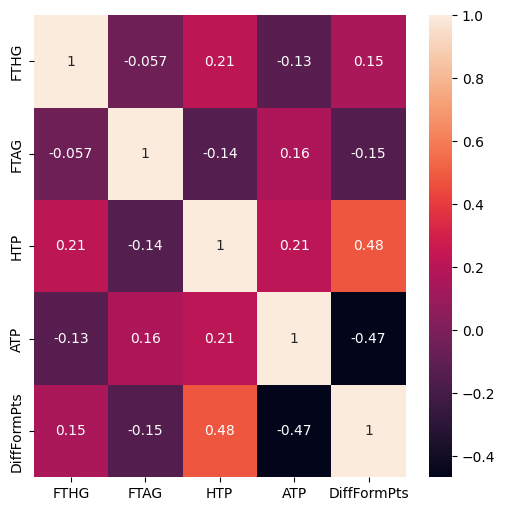

In [18]:
plt.figure(figsize=(6,6)) 
numbered_dataset = dataset[['FTHG', 'FTAG', 'HTP', 'ATP', 'DiffFormPts']]
sns.heatmap(numbered_dataset.corr(), annot= True)

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

In [19]:
# Remove few column
dataset2 = dataset.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )

In [20]:
dataset2.keys()

Index(['Unnamed: 0', 'FTR', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2',
       'AM3', 'HTGD', 'ATGD', 'DiffFormPts'],
      dtype='object')

In [21]:
dataset2.head(10)

,Unnamed: 0,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
0,0,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
1,1,A,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
2,2,A,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
3,3,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
4,4,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
5,5,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
6,6,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
7,7,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
8,8,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
9,9,D,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0


In [22]:
#what is the win rate for the home team?

# Total number of matches.
n_matches = dataset2.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = dataset2.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(dataset2[dataset2.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print( "Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 3040
Number of features: 12
Number of matches won by home team: 1390
Win rate of home team: 45.72%


## Visualise the dataset

array([[<Axes: xlabel='HTGD', ylabel='HTGD'>,
        <Axes: xlabel='ATGD', ylabel='HTGD'>,
        <Axes: xlabel='HTP', ylabel='HTGD'>,
        <Axes: xlabel='ATP', ylabel='HTGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTGD'>],
       [<Axes: xlabel='HTGD', ylabel='ATGD'>,
        <Axes: xlabel='ATGD', ylabel='ATGD'>,
        <Axes: xlabel='HTP', ylabel='ATGD'>,
        <Axes: xlabel='ATP', ylabel='ATGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATGD'>],
       [<Axes: xlabel='HTGD', ylabel='HTP'>,
        <Axes: xlabel='ATGD', ylabel='HTP'>,
        <Axes: xlabel='HTP', ylabel='HTP'>,
        <Axes: xlabel='ATP', ylabel='HTP'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTP'>],
       [<Axes: xlabel='HTGD', ylabel='ATP'>,
        <Axes: xlabel='ATGD', ylabel='ATP'>,
        <Axes: xlabel='HTP', ylabel='ATP'>,
        <Axes: xlabel='ATP', ylabel='ATP'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATP'>],
       [<Axes: xlabel='HTGD', ylabel='DiffFormPts'>,
        <Axes

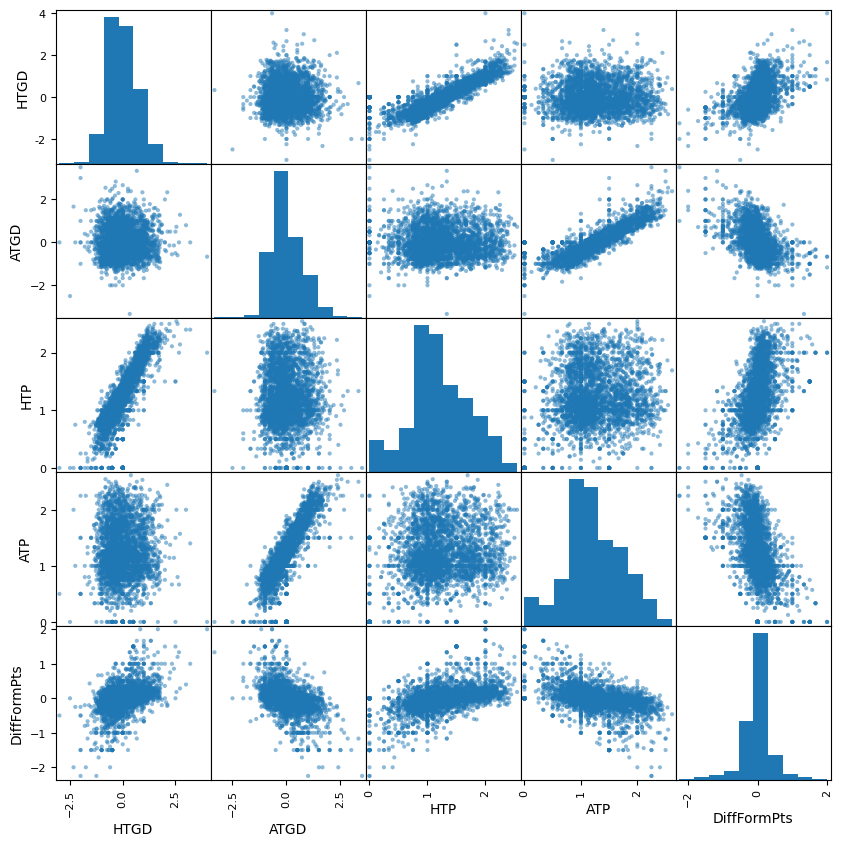

In [23]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

scatter_matrix(dataset2[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(10, 10))

In [24]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = dataset2.drop(['FTR'], axis=1)
y_all = dataset2['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])
    

In [25]:
#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.items():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (30 total features):
['Unnamed: 0', 'HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts']


In [26]:
X_all.head(10)

,Unnamed: 0,HTP,ATP,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,HM2_L,HM2_M,...,AM2_L,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W,HTGD,ATGD,DiffFormPts
0,0,-2.317139,-2.356284,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.014507,-0.019888,0.0
1,1,-2.317139,-2.356284,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.014507,-0.019888,0.0
2,2,-2.317139,-2.356284,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.014507,-0.019888,0.0
3,3,-2.317139,-2.356284,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.014507,-0.019888,0.0
4,4,-2.317139,-2.356284,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.014507,-0.019888,0.0
5,5,-2.317139,-2.356284,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.014507,-0.019888,0.0
6,6,-2.317139,-2.356284,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.014507,-0.019888,0.0
7,7,-2.317139,-2.356284,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.014507,-0.019888,0.0
8,8,-2.317139,-2.356284,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.014507,-0.019888,0.0
9,9,-2.317139,-2.356284,False,False,True,False,False,False,True,...,False,True,False,False,False,True,False,0.014507,-0.019888,0.0


## Spliting the dataset

In [27]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# # Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.1,
                                                    stratify = y_all)

# sss = StratifiedShuffleSplit(test_size=0.2)

# for train_index, test_index in sss.split(X_all, y_all):
#     # print('TRAIN:', train_index, 'TEST:', test_index)
#     X_train, X_test = X_all.iloc[train_index], X_all.iloc[test_index]
#     y_train, y_test = y_all[train_index], y_all[test_index]

# Applying the Logistic Regression

In [28]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

c:\Users\Administrador\.virtualenvs\Final-B-BC5ZHm\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [29]:
Y_pred = classifier.predict(X_test)

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

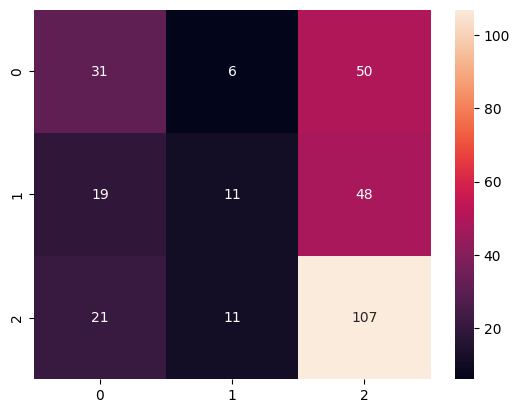

In [31]:
sns.heatmap(cm, annot=True,fmt='d')

In [32]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           A       0.44      0.36      0.39        87
           D       0.39      0.14      0.21        78
           H       0.52      0.77      0.62       139

    accuracy                           0.49       304
   macro avg       0.45      0.42      0.41       304
weighted avg       0.46      0.49      0.45       304



# Applying the SVM

In [33]:
#fitting the SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [34]:
#predicting result
Y_pred = classifier.predict(X_test)

In [35]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

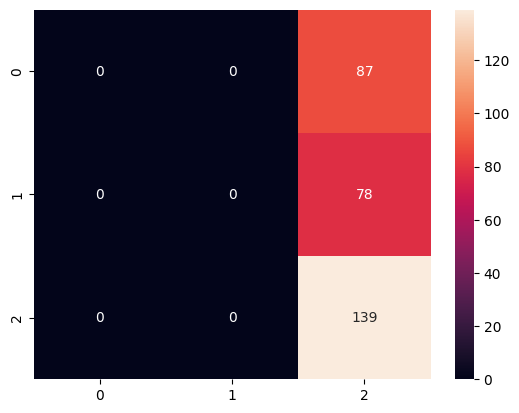

In [36]:
sns.heatmap(cm, annot=True, fmt='d')

In [37]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        87
           D       0.00      0.00      0.00        78
           H       0.46      1.00      0.63       139

    accuracy                           0.46       304
   macro avg       0.15      0.33      0.21       304
weighted avg       0.21      0.46      0.29       304



c:\Users\Administrador\.virtualenvs\Final-B-BC5ZHm\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Administrador\.virtualenvs\Final-B-BC5ZHm\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Administrador\.virtualenvs\Final-B-BC5ZHm\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

# Applying the RandomForest

In [38]:
#fitting the RANDOM FOREST to the training se
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True)

In [39]:
#predicting result
Y_pred = classifier.predict(X_test)

In [40]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

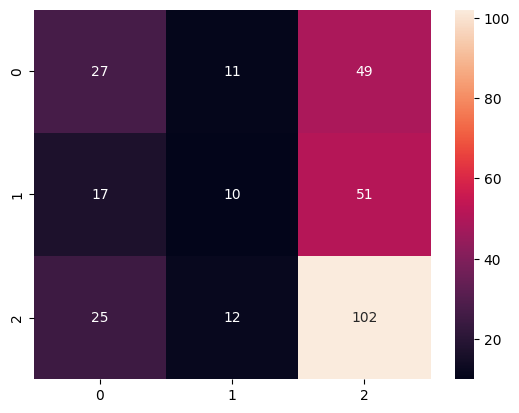

In [41]:
sns.heatmap(cm, annot=True, fmt='d')

In [42]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           A       0.39      0.31      0.35        87
           D       0.30      0.13      0.18        78
           H       0.50      0.73      0.60       139

    accuracy                           0.46       304
   macro avg       0.40      0.39      0.37       304
weighted avg       0.42      0.46      0.42       304



# Applying the XGBoost

Finish iteration 0
Finish iteration 1
Finish iteration 2
Finish iteration 3
Finish iteration 4


<Axes: >

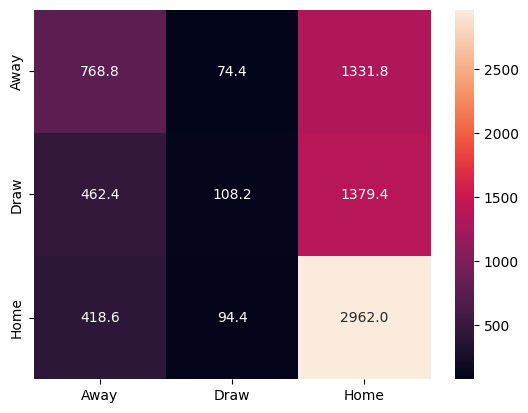

In [74]:
# Fitting XGBoost to the Training set
import os
import csv
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

from time import time

iterations = 5
cm_mean = np.zeros((3,3))

estimators = [10, 20, 50, 100, 200]
max_depth = [2, 3, 5, 7, 10]
eta = [0.000001, 0.00001, 0.0001, 0.001, 0.01]

for i in range(iterations):
    for j in range(len(estimators)):
        for k in range(len(eta)):
            X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                            test_size = 0.1,
                                                            stratify = y_all)
            
            le = LabelEncoder()

            le.fit(y_train)
            # print(le.classes_)
            y_train = le.fit_transform(y_train)
            
            classifier = XGBClassifier(n_estimators=estimators[j], learning_rate=eta[k], max_depth=3, objective='multi:softmax')
            classifier.fit(X_train, y_train)

            # Predicting the Test set results
            start_time = time()
            Y_pred = le.inverse_transform(classifier.predict(X_test))
            end_time = time()
            cm_mean += confusion_matrix(y_test, Y_pred)

            not_exists = False

            if not os.path.exists('predictions.csv'):
                not_exists = True

            with open('predictions.csv', 'a', newline='') as file:
                writer = csv.writer(file)
                if not_exists:
                    writer.writerow(['estimators', 'eta', 'accuracy', 'time']) #, 'recall', 'f1-score'])
                writer.writerow([estimators[j], eta[k], accuracy_score(y_test, Y_pred) * 100, (end_time - start_time) * 1000]) #recall_score(y_test, Y_pred, average='macro'), f1_score(y_test, Y_pred, average='macro')])
    print('Finish iteration ' + str(i))

cm_mean /= iterations
sns.heatmap(cm_mean, annot=True, fmt='.1f', xticklabels=['Away','Draw','Home'], yticklabels=['Away','Draw','Home'])

In [44]:
# Predicting the Test set results
Y_pred = le.inverse_transform(classifier.predict(X_test))

In [45]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

<Axes: >

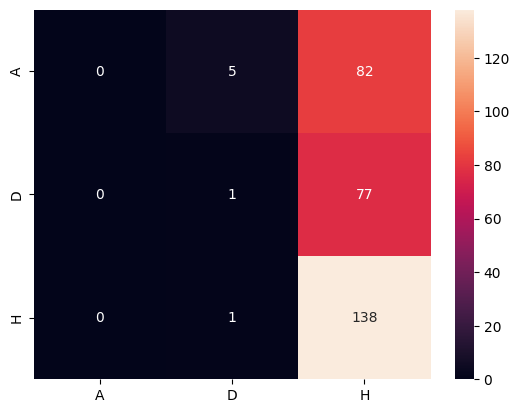

In [46]:
sns.heatmap(cm, annot=True,fmt='d', xticklabels=['A','D','H'], yticklabels=['A','D','H'])

In [47]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        87
           D       0.14      0.01      0.02        78
           H       0.46      0.99      0.63       139

    accuracy                           0.46       304
   macro avg       0.20      0.34      0.22       304
weighted avg       0.25      0.46      0.30       304



c:\Users\Administrador\.virtualenvs\Final-B-BC5ZHm\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Administrador\.virtualenvs\Final-B-BC5ZHm\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Administrador\.virtualenvs\Final-B-BC5ZHm\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

**Clearly XGBoost seems like the best model as it has the highest F1 score and accuracy score on the test set.**

# Tuning the parameters of XGBoost.


In [48]:
# # TODO: Import 'GridSearchCV' and 'make_scorer'
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, f1_score
# import xgboost as xgb

# # TODO: Create the parameters list you wish to tune
# parameters = { 'learning_rate' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
#                'n_estimators' : [50, 100, 200, 400, 700, 1000],
#                'max_depth': [3, 5, 7, 9, 11],
#                'min_child_weight': [3, 5, 7, 9, 11],
#                'gamma':[0.4],
#                'subsample' : [0.8],
#                'colsample_bytree' : [0.8],
#                'reg_alpha':[1e-5]
#              }  

# def predict_labels(clf, features, target):
#     ''' Makes predictions using a fit classifier based on F1 score. '''

#     y_pred = clf.predict(features)
    
#     return f1_score(target, y_pred, pos_label='H', average='micro'), sum(target == y_pred) / float(len(y_pred))


# # TODO: Initialize the classifier
# clf = xgb.XGBClassifier(seed=2)

# # TODO: Make an f1 scoring function using 'make_scorer' 
# f1_scorer = make_scorer(f1_score,pos_label=0)

# # TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
# grid_obj = GridSearchCV(clf,
#                         scoring=f1_scorer,
#                         param_grid=parameters,
#                         cv=5)

# # TODO: Fit the grid search object to the training data and find the optimal parameters
# grid_obj = grid_obj.fit(X_train,y_train)

# # Get the estimator
# clf = grid_obj.best_estimator_
# print(clf)

# # Report the final F1 score for training and testing after parameter tuning
# f1, acc = predict_labels(clf, X_train, y_train)
# print( "F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
# f1, acc = predict_labels(clf, X_test, y_test)
# print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

#### Probably little best!!!!!!!!

Accuracy is not soo good but it can improved.

Actually it only depend upon past year match dataset,we can improve the accuracy by putting twitter data related to match, sentiment analysis, chances of player to play a specific match,player performace in recent series,etc..

I hope you find this kernel useful and enjoyable. If so please upVote

Your comments and feedback are most welcome.